In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os

In [80]:
# Reading the file and skip the first 4 rows
gdp_df = pd.read_csv("API_NY.GDP.MKTP.CD_DS2_es_csv_v2_5998674.csv", skiprows=4)
gdp_df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,NaN,NaN
1,NaN,AFE,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,2.112502e+10,2.161623e+10,2.350628e+10,2.804836e+10,2.592067e+10,2.947210e+10,...,1.006526e+12,9.273485e+11,8.851764e+11,1.021043e+12,1.007196e+12,1.000834e+12,9.275933e+11,1.081998e+12,1.169484e+12,NaN
2,Afganistán,AFG,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,NaN,NaN
3,NaN,AFW,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,1.044764e+10,1.117321e+10,1.199053e+10,1.272769e+10,1.389811e+10,1.492979e+10,...,8.943225e+11,7.686447e+11,6.913634e+11,6.848988e+11,7.670257e+11,8.225384e+11,7.864600e+11,8.444597e+11,8.778633e+11,NaN
4,Angola,AGO,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.067136e+11,NaN


In [81]:

df = gdp_df[gdp_df['Country Name'] == 'Alemania']
df = df.drop(columns=['Country Name','Country Code', 'Indicator Name', 'Indicator Code'])
df = df.transpose()
df = df.reset_index()
df = df.rename(columns={'index': 'YEAR', 55: 'GDP'})
df = df[(df['YEAR'] > '1969') & (df['YEAR'] < '2022')]

germany_gdp_df = df
germany_gdp_df.head()

,YEAR,GDP
10,1970,2.158384e+11
11,1971,2.499851e+11
12,1972,2.998015e+11
13,1973,3.983740e+11
14,1974,4.453035e+11


### Plot 1. GDP-YEARS

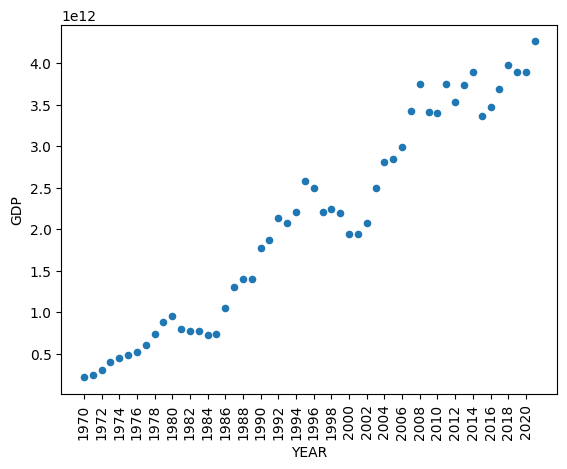

In [82]:
graph = germany_gdp_df.plot.scatter(x='YEAR',y='GDP')
graph.set_xticks(germany_gdp_df['YEAR'][::2]) # Show you a lable every 2 years
graph.set_xticklabels(germany_gdp_df['YEAR'][::2], rotation=90) # Rotate the labels 90°

plt.show()

In [83]:
# In ML it is normal to represent "m" as "w".
w = 215838448137.658
b = 0

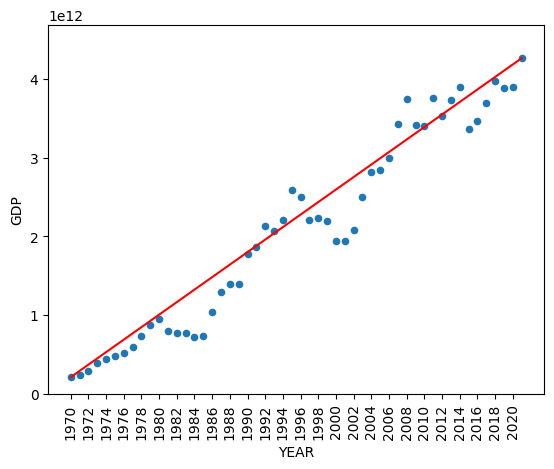

In [84]:
# Calculation of the regression line (using w and b)
x = np.linspace(float(germany_gdp_df['YEAR'].min()), float(germany_gdp_df['YEAR'].max()), 100)
y = w * x + b

# Create the scatter plot
graph = germany_gdp_df.plot.scatter(x='YEAR', y='GDP')

# Set the locations and labels of the tick marks on the X-axis for each 2 years
graph.set_xticks(germany_gdp_df['YEAR'][::2])
graph.set_xticklabels(germany_gdp_df['YEAR'][::2], rotation=90)

# Plot the red line going from the minimum to the maximum GDP
plt.plot([germany_gdp_df['YEAR'].min(), germany_gdp_df['YEAR'].max()], [germany_gdp_df['GDP'].min(), germany_gdp_df['GDP'].max()], '-r')

# Set limits for the Y-axis
plt.ylim(0, int(germany_gdp_df['GDP'].max() * 1.1))

# Show the graph
plt.show()


In [85]:
germany_gdp_df.head(3)

,YEAR,GDP
10,1970,2.158384e+11
11,1971,2.499851e+11
12,1972,2.998015e+11


In [86]:
# Calculation of predictions
germany_gdp_df['pred'] = germany_gdp_df['GDP']*w+b
germany_gdp_df.head(3)

,YEAR,GDP,pred
10,1970,2.158384e+11,4.658624e+22
11,1971,2.499851e+11,5.395639e+22
12,1972,2.998015e+11,6.470870e+22


In [88]:
# Calculation of the error function
germany_gdp_df['diff'] = germany_gdp_df['pred'] - germany_gdp_df['GDP']
germany_gdp_df['square'] = germany_gdp_df['diff'] **2
germany_gdp_df.head(3)

,YEAR,GDP,pred,diff,square
10,1970,2.158384e+11,4.658624e+22,4.658624e+22,2.170277e+45
11,1971,2.499851e+11,5.395639e+22,5.395639e+22,2.911292e+45
12,1972,2.998015e+11,6.470870e+22,6.470870e+22,4.187216e+45


In [89]:
# Function based on m, b=0

w = np.linspace(100000000000, 215838448137, 50)
grid_error = pd.DataFrame(w, columns=['w'])
grid_error.head()

,w
0,1.000000e+11
1,1.023640e+11
2,1.047281e+11
3,1.070921e+11
4,1.094562e+11


In [90]:
def error(w, germany_gdp_df):
    """
    Calculate the mean squared error for a given parameter 'w' and GDP data.

    Args:
    w (float): Parameter for prediction.
    germany_gdp_df (pandas.DataFrame): DataFrame containing GDP data.

    Returns:
    float: Mean squared error.
    """
    
    b = 0
    germany_gdp_df['pred'] = germany_gdp_df['GDP'] * w + b
    germany_gdp_df['diff'] = germany_gdp_df['pred'] - germany_gdp_df['GDP']
    germany_gdp_df['square'] = germany_gdp_df['diff'] ** 2
    return germany_gdp_df['square'].mean()


In [91]:
# Compute error values for each 'w' in the DataFrame 'grid_error'
grid_error['error'] = grid_error['w'].apply(lambda x: error(x, germany_gdp_df))
grid_error.head(3)


,w,error
0,1.000000e+11,5.962121e+46
1,1.023640e+11,6.247349e+46
2,1.047281e+11,6.539240e+46


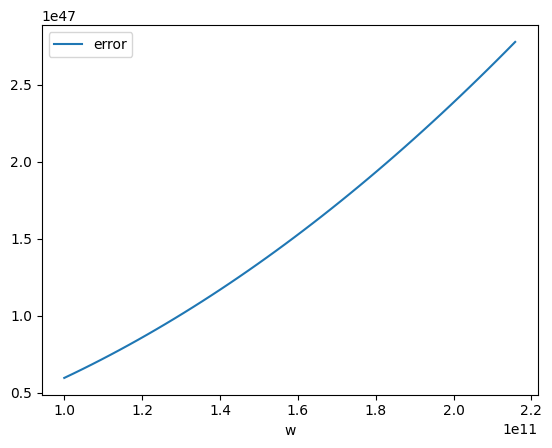

In [92]:
# Show the error
grid_error.plot(x='w',y='error')
plt.show()

In [100]:
# Input and output
X_train = np.array(germany_gdp_df['YEAR']).reshape((-1, 1))
Y_train = np.array(germany_gdp_df['GDP'])

model = LinearRegression(fit_intercept=False)
model.fit(X_train, Y_train)

# New parameters for the model
w_new = model.coef_

print(f"intercepto (b): {model.intercept_}")
print(f"pendiente (w): {model.coef_}")

intercepto (b): 0.0
pendiente (w): [1.05557634e+09]


In [101]:
# Calculation of predictions with new value of w
germany_gdp_df['pred'] = germany_gdp_df['GDP']* w_new + b
germany_gdp_df.head(3)

,YEAR,GDP,pred,diff,square
10,1970,2.158384e+11,2.278340e+20,4.658624e+22,2.170277e+45
11,1971,2.499851e+11,2.638783e+20,5.395639e+22,2.911292e+45
12,1972,2.998015e+11,3.164634e+20,6.470870e+22,4.187216e+45


In [99]:
name_file = 'linearRegresion_Germany.xlsx'

# Try to delete the file if it exists
try:
    if os.path.exists(name_file):
        os.remove(name_file)
        print(f"File '{name_file}' existing eliminated.")
except Exception as e:
    print(f"File could not be deleted: {e}")

# Intenta crear un nuevo archivo
try:
    germany_gdp_df.to_excel(name_file, index=False, engine='openpyxl')
    print(f"New file '{name_file}' created.")
except Exception as e:
    print(f"New file could not be created: {e}")


Archivo 'linearRegresion_Germany.xlsx' existente eliminado.
Nuevo archivo 'linearRegresion_Germany.xlsx' creado.
